In [1]:
from keras import models, layers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt
import os


Using TensorFlow backend.


# Feature extraction by extending convulation base to support data augumentation

In [2]:
# Initializing convulation base
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
## Model definition
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', ))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before compile and train a model its very important to freeze the convulation base
Freezing a layer means preventing their weights from being updated during training
This can be done in keras by seeting its trainable attribue to false

In [4]:
len(model.trainable_weights)

30

In [5]:
conv_base.trainable = False
len(model.trainable_weights)

4

After freezing a convulation base you must compile your model

In [6]:
# Selecting dataset directories
base_dir = '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/SmallDataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
# Image data generation
train_datagen = ImageDataGenerator(1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# Compile a model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [9]:
# Train a model via fit_generator method
history = model.fit_generator(train_generator, epochs=30, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/30


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 78s 782ms/step - loss: 2.4326 - acc: 0.7410 - val_loss: 0.7828 - val_acc: 0.8770
Epoch 2/30
100/100 [==============================] - 71s 712ms/step - loss: 1.5070 - acc: 0.8365 - val_loss: 0.9950 - val_acc: 0.8940
Epoch 3/30
100/100 [==============================] - 71s 714ms/step - loss: 1.1133 - acc: 0.8560 - val_loss: 0.5539 - val_acc: 0.9080
Epoch 4/30
100/100 [==============================] - 71s 714ms/step - loss: 1.1138 - acc: 0.8670 - val_loss: 0.0193 - val_acc: 0.9240
Epoch 5/30
100/100 [==============================] - 71s 706ms/step - loss: 1.0138 - acc: 0.8850 - val_loss: 0.3971 - val_acc: 0.9190
Epoch 6/30
100/100 [==============================] - 71s 713ms/step - loss: 0.8544 - acc: 0.8955 - val_loss: 0.6608 - val_acc: 0.9220
Epoch 7/30
100/100 [==============================] - 70s 702ms/step - loss: 0.8714 - acc: 0.8840 - val_loss: 1.7891 - val_acc: 0.9240
Epoch 8/30
100/100 [==============================] - 70s 705ms/st

# Plotting the results

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
# Data given
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

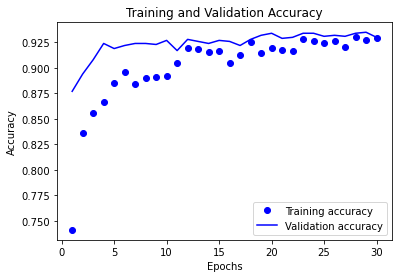

In [12]:
# Plotting training and validation accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

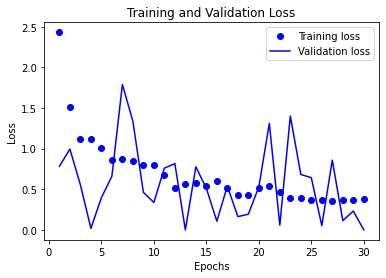

In [13]:
# Plotting Training and Validation loss
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()